In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import os

from python_ising_mcmc import IsingMonteCarloEngine
from python_ising_mcmc.types import IsingMCMCResult
from python_ising_mcmc.utils import parallel_process, save_to_pickle

In [2]:
def run_parallel(
    **kwargs
) -> IsingMCMCResult:
    
    engine = IsingMonteCarloEngine(**kwargs)

    return engine.run()


In [20]:
engine = IsingMonteCarloEngine(lattice_size=(20, 20), eq_steps=30000, sim_steps=1000000)
result = engine.run()

Sim complete in 0:00:38 (size=(20, 20), temp=2.6).


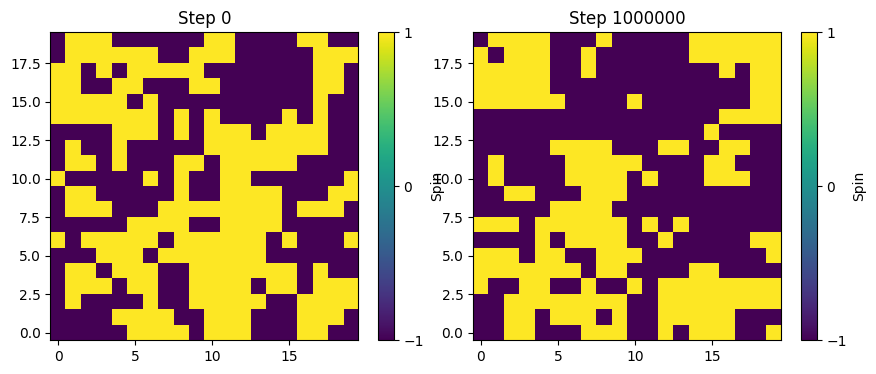

In [25]:
from matplotlib.ticker import MultipleLocator
fig, axs = plt.subplots(1,2, figsize=(10,4))

step1 = 0
fig, ax, cbar = result.show_lattice(step=step1, ax=axs[0])
axs[0].set_title(f"Step {step1}")
cbar.set_label("Spin")
cbar.ax.yaxis.set_major_locator(MultipleLocator(1))

step2 = 1000000
fig, ax, cbar = result.show_lattice(step=step2, ax=axs[1])
axs[1].set_title(f"Step {step2}")
cbar.set_label("Spin")
cbar.ax.yaxis.set_major_locator(MultipleLocator(1))

Text(0, 0.5, 'Magnetisation (net)')

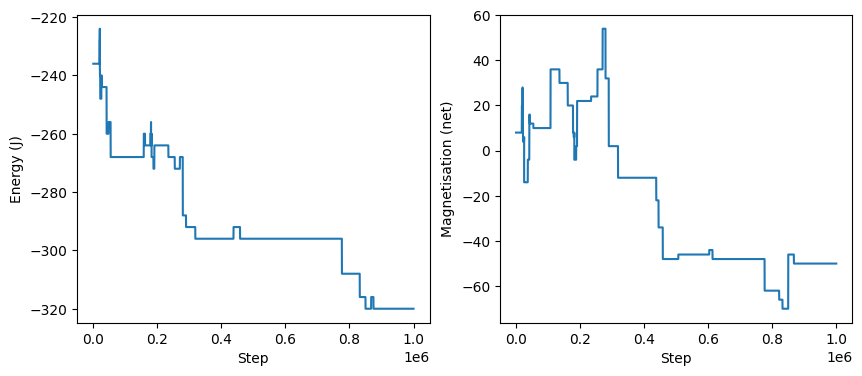

In [24]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(result.energy)
axs[0].set_xlabel("Step")
axs[0].set_ylabel("Energy (J)")

axs[1].plot(result.magnetisation)
axs[1].set_xlabel("Step")
axs[1].set_ylabel("Magnetisation (net)")


Define simulation parameters

In [12]:
eq_steps = 30000  # probably needs to be much higher, I can't be bothered to investigate
sim_steps = 1000000 # probably needs to be much higher, I can't be bothered to investigate

kB = 1.0  # change as needed
coupl_const = 1.0  # change as needed
flip_frac = 0.1  # change as needed, but keep small

temperatures = np.linspace(1.6, 3.6, 3)  # change as needed
lattice_sizes = np.arange(3, 6, 2, dtype=int)  # change as needed

args = []

for lat_size in lattice_sizes:

    for temp in temperatures:

        args.append(
            {
                "lattice_size": (lat_size, lat_size),
                "eq_steps": eq_steps,
                "sim_steps": sim_steps,
                "kB": sim_steps,
                "coupl_const": coupl_const,
                "temp": temp,
                "flip_frac": flip_frac,
            }
        )

In [ ]:
if __name__ == "__main__":

    logger = logging.getLogger(__name__)

    results = parallel_process(
        arg_list=args, function=run_parallel, n_jobs=os.cpu_count() - 2 or 1
    )

    save_to_pickle(results, "ising_mc_results.pkl")

